## Importations des modules

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import math
#import random
#from json import loads, dumps
from numpy.random import default_rng
#from dataclasses import dataclass
from collections import defaultdict

In [16]:
from modules.sql_utils_2 import get_sql_student_data, get_sql_intervenants

## Données réelles SQL

In [2]:
import sqlite3
from enum import Enum

In [3]:

con = sqlite3.connect("./data/2026/db-forum-notebook-20-itv-driven-2026-test.db")

In [17]:
# get students data

student_data = get_sql_student_data(con)
print("nb élèves : {}".format(len(student_data)))
print(pd.DataFrame(student_data)[0:5])

nb élèves : 210
     id               wishes itv_visited
0  3100   [10, 15, 2, 13, 5]          []
1  3101  [12, 15, 19, 7, 11]          []
2  3102   [11, 12, 9, 6, 16]          []
3  3103    [9, 10, 6, 18, 5]          []
4  3104    [9, 10, 17, 2, 8]          []


In [18]:
# intervenants data from SQL

intervenants_data_from_sql = get_sql_intervenants(con)
intervenants_data_from_sql[:5]

[[],
 [{'id': 1, 'batch_size': 5, 'id_metier': '1-0', 'Q': []},
  {'id': 2, 'batch_size': 5, 'id_metier': '1-1', 'Q': []},
  {'id': 3, 'batch_size': 5, 'id_metier': '1-2', 'Q': []}],
 [{'id': 4, 'batch_size': 5, 'id_metier': '2-0', 'Q': []},
  {'id': 5, 'batch_size': 5, 'id_metier': '2-1', 'Q': []}],
 [{'id': 6, 'batch_size': 5, 'id_metier': '3-0', 'Q': []}],
 [{'id': 7, 'batch_size': 5, 'id_metier': '4-0', 'Q': []}]]

In [25]:
# Pour un ensemble de données élèves, faire la somme par métier des choix élèves

def sum_wishes(students):
    wishes = defaultdict(int)
    for i in range(len(intervenants_data_from_sql)):
        wishes[i] = 0
        
    for student in students:
        for w in student['wishes']:
            wishes[w] += 1
    return wishes

<Axes: >

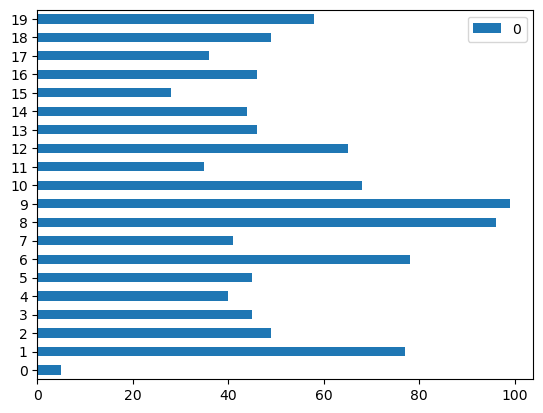

In [26]:
df = pd.DataFrame(sum_wishes(student_data).values())
df.plot(kind='barh')

## Données générées

In [22]:
def generate_rnd_students(nb_students=238, nb_cat=21, nb_choices=5):
    l_result = []
    for n_student in range(nb_students):
        s_choices = np.random.permutation(nb_cat)[:nb_choices]
        #s_choices = np.random.choice(nb_cat, nb_choices)
        l_result.append({ 'id':n_student, 'wishes':s_choices})
    return l_result

In [79]:

random_students = generate_rnd_students()
df = pd.DataFrame(sum_wishes(random_students).values())

#random_students
print("mean : {}".format(df.mean()))
print("std  : {}".format(df.std()))
print("min  : {}".format(df.min()))
print("max  : {}".format(df.max()))


mean : 0    56.666667
dtype: float64
std  : 0    6.052548
dtype: float64
min  : 0    44
dtype: int64
max  : 0    68
dtype: int64


<Axes: >

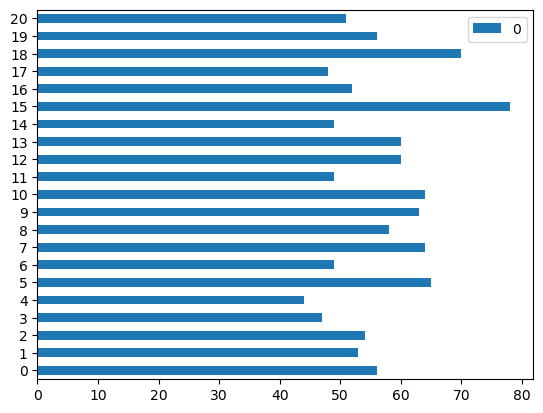

In [37]:
df.plot(kind='barh')